In [7]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import TimeSeriesSplit
from tensorflow.keras.callbacks import EarlyStopping
from math import sqrt
from sklearn.model_selection import train_test_split

In [8]:
# Get stock data from Yahoo Finance
def get_stock_data(symbol):
    stock_data = yf.download(symbol)
    
    plt.figure(figsize=(10, 6))
    plt.plot(stock_data.index, stock_data['Close'], label='Close Price')
    plt.title(f'{symbol} Close Price')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    return stock_data.index, stock_data['Adj Close'].values.reshape(-1, 1)

In [9]:
def get_volatility(symbol, start_date, end_date):
    data = yf.download(symbol, start=start_date, end=end_date)
    
    # Calculate daily log returns
    data['Log Returns'] = np.log(data['Close'] / data['Close'].shift(1))
    
    # standard deviation of log returns
    volatility = data['Log Returns'].std() * np.sqrt(252)
    
    return volatility

symbol_volatile = "TSLA"
symbol_stable = "AMD"
start_date = "2020-01-01"
end_date = "2023-01-01"

volatility_volatile = get_volatility(symbol_volatile, start_date, end_date)
volatility_stable = get_volatility(symbol_stable, start_date, end_date)

print(f"Volatility for {symbol_volatile}: {volatility_volatile}")
print(f"Volatility for {symbol_stable}: {volatility_stable}")

C:\Users\ashma\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


C:\Users\ashma\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed

Volatility for TSLA: 0.722106072063015
Volatility for AMD: 0.5550694626138316


In [10]:
# Create sequences for training
def create_sequences(data, seq_length):
    sequences = []
    targets = []
    for i in range(len(data) - seq_length):
        seq = data[i:i + seq_length]
        target = data[i + seq_length]
        sequences.append(seq)
        targets.append(target)
    return np.array(sequences), np.array(targets)

In [11]:
# Plot actual vs. predicted values
def plot_predictions_with_dates(dates, actual, predicted, title):
    plt.figure(figsize=(10, 6))
    plt.plot(dates, actual.flatten(), label='Actual') 
    plt.plot(dates, predicted.flatten(), label='Predicted')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()

In [12]:
# Define stock symbols and sequence length
symbols = ['AAPL', 'GOOGL', 'TSLA', 'AMD']
sequence_length = 10

In [13]:
def evaluate_model_performance(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"R^2 Score: {r2}")


C:\Users\ashma\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


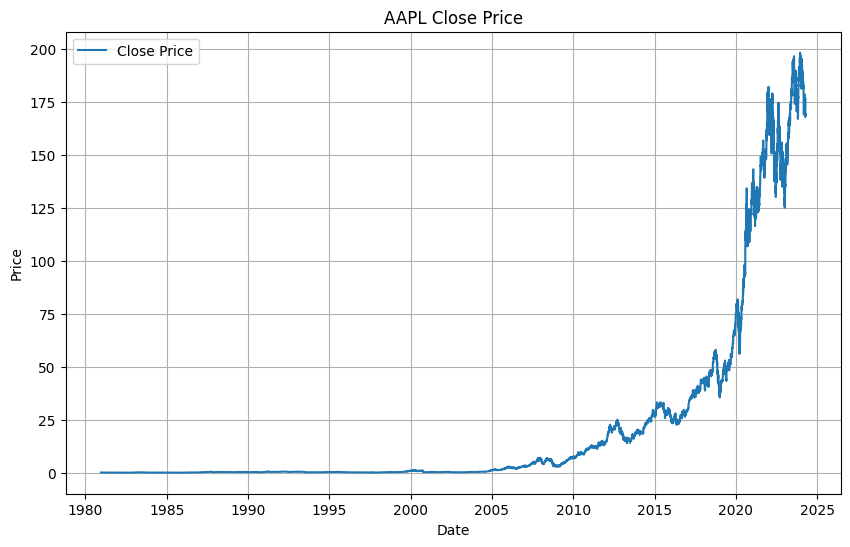



Epoch 1/10

246/246 - 4s - loss: 1.6448e-05 - val_loss: 1.2284e-04 - 4s/epoch - 17ms/step
Epoch 2/10
246/246 - 1s - loss: 3.9185e-06 - val_loss: 5.6233e-05 - 1s/epoch - 5ms/step
Epoch 3/10
246/246 - 1s - loss: 3.5590e-06 - val_loss: 1.1135e-05 - 1s/epoch - 4ms/step
Epoch 4/10
246/246 - 1s - loss: 3.4225e-06 - val_loss: 1.1913e-05 - 1s/epoch - 5ms/step
Epoch 5/10
246/246 - 1s - loss: 3.6537e-06 - val_loss: 4.3101e-05 - 1s/epoch - 5ms/step
Epoch 6/10
246/246 - 1s - loss: 3.9960e-06 - val_loss: 1.0472e-05 - 1s/epoch - 5ms/step
Epoch 7/10
246/246 - 1s - loss: 3.5848e-06 - val_loss: 1.3695e-05 - 1s/epoch - 5ms/step
Epoch 8/10
246/246 - 1s - loss: 3.8572e-06 - val_loss: 1.4077e-05 - 1s/epoch - 5ms/step
Epoch 9/10
246/246 - 1s - loss: 2.9727e-06 - val_loss: 3.8628e-05 - 1s/epoch - 5ms/step
Epoch 10/10
246/246 - 1s - loss: 2.9779e-06 - val_loss: 8.1797e-05 - 1s/epoch - 5ms/step
69/69 [==============================] - 1s 2ms/step


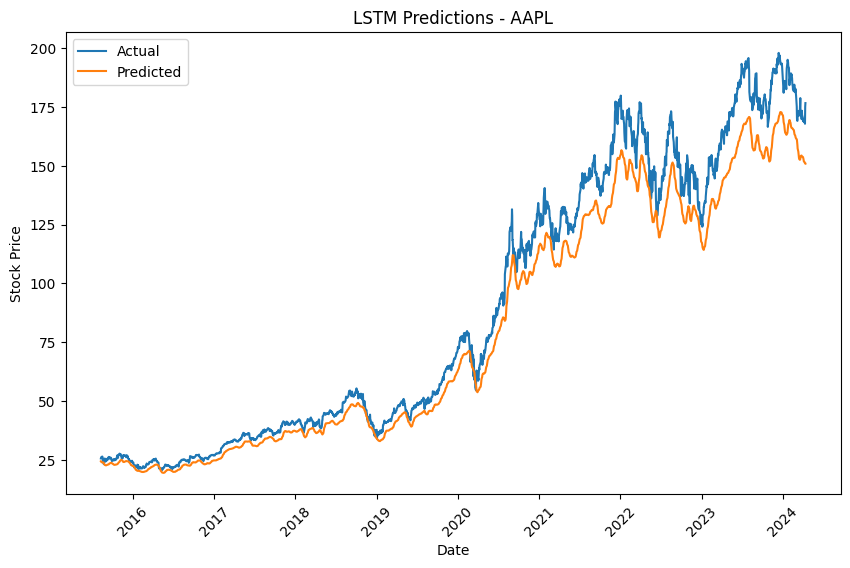

C:\Users\ashma\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed

Evaluating LSTM Performance for AAPL
Mean Squared Error (MSE): 146.6232694363184
Root Mean Squared Error (RMSE): 12.108809579653913
Mean Absolute Error (MAE): 9.456462650412657
R^2 Score: 0.9564302050341585


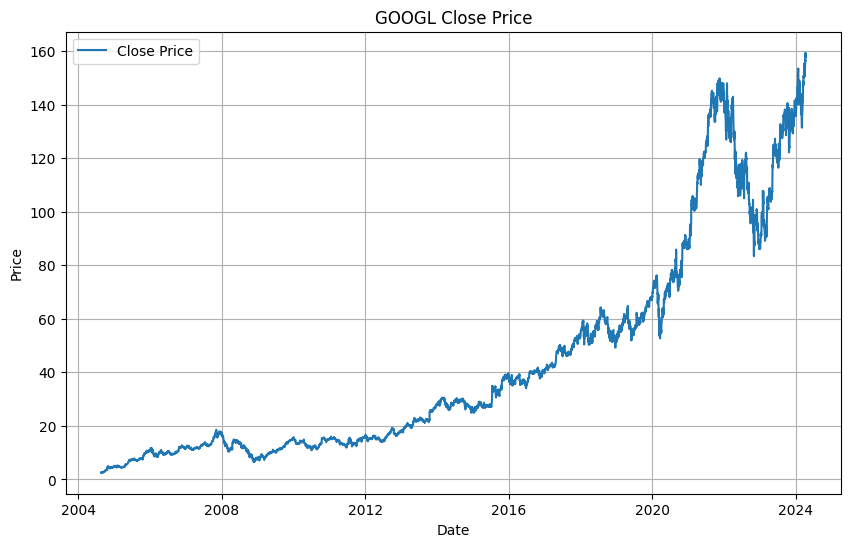

Epoch 1/10
112/112 - 3s - loss: 0.0016 - val_loss: 7.2557e-04 - 3s/epoch - 28ms/step
Epoch 2/10
112/112 - 1s - loss: 3.1505e-04 - val_loss: 2.6657e-04 - 526ms/epoch - 5ms/step
Epoch 3/10
112/112 - 1s - loss: 2.2248e-04 - val_loss: 2.0585e-04 - 557ms/epoch - 5ms/step
Epoch 4/10
112/112 - 1s - loss: 1.8945e-04 - val_loss: 2.2914e-04 - 518ms/epoch - 5ms/step
Epoch 5/10
112/112 - 1s - loss: 1.8857e-04 - val_loss: 1.9012e-04 - 520ms/epoch - 5ms/step
Epoch 6/10
112/112 - 1s - loss: 1.7669e-04 - val_loss: 4.9298e-04 - 526ms/epoch - 5ms/step
Epoch 7/10
112/112 - 1s - loss: 1.8160e-04 - val_loss: 5.8735e-04 - 522ms/epoch - 5ms/step
Epoch 8/10
112/112 - 1s - loss: 1.7515e-04 - val_loss: 2.5806e-04 - 527ms/epoch - 5ms/step
Epoch 9/10
112/112 - 1s - loss: 1.4548e-04 - val_loss: 1.7832e-04 - 520ms/epoch - 5ms/step
Epoch 10/10
112/112 - 1s - loss: 1.4472e-04 - val_loss: 1.9199e-04 - 524ms/epoch - 5ms/step
31/31 [==============================] - 0s 2ms/step


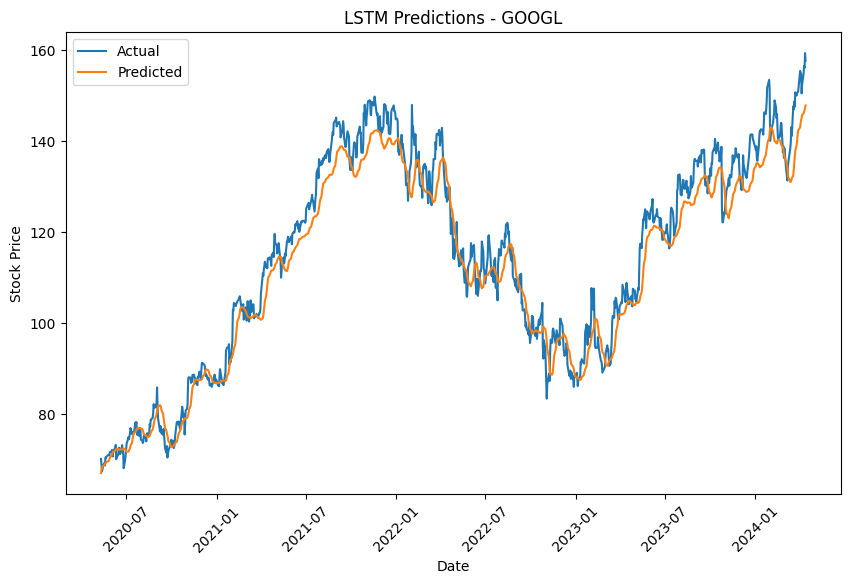

Evaluating LSTM Performance for GOOGL
Mean Squared Error (MSE): 26.51329548197966
Root Mean Squared Error (RMSE): 5.1491062799266105
Mean Absolute Error (MAE): 4.114413790374632
R^2 Score: 0.9510354582469751


C:\Users\ashma\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


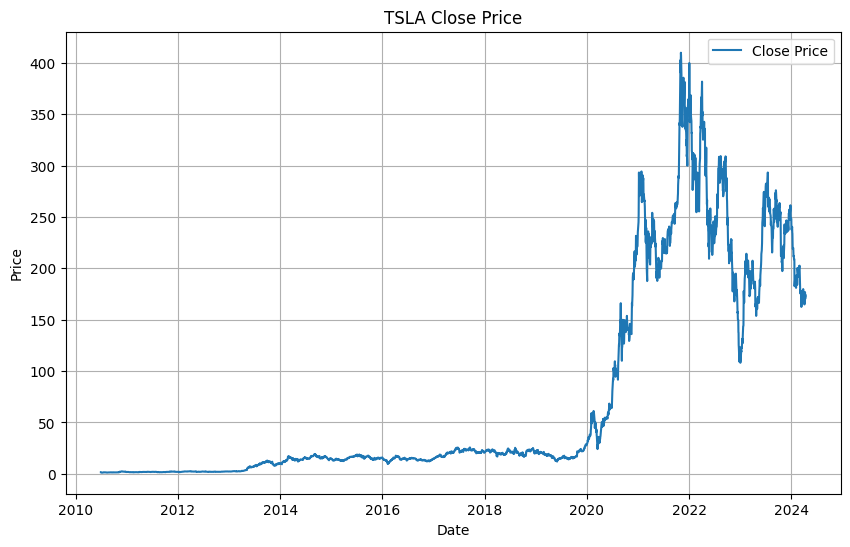

Epoch 1/10
78/78 - 3s - loss: 1.6689e-04 - val_loss: 0.0107 - 3s/epoch - 41ms/step
Epoch 2/10
78/78 - 0s - loss: 3.2591e-05 - val_loss: 0.0103 - 391ms/epoch - 5ms/step
Epoch 3/10
78/78 - 0s - loss: 2.6824e-05 - val_loss: 0.0074 - 404ms/epoch - 5ms/step
Epoch 4/10
78/78 - 0s - loss: 2.6643e-05 - val_loss: 0.0077 - 395ms/epoch - 5ms/step
Epoch 5/10
78/78 - 0s - loss: 2.8704e-05 - val_loss: 0.0043 - 393ms/epoch - 5ms/step
Epoch 6/10
78/78 - 0s - loss: 2.6392e-05 - val_loss: 0.0022 - 395ms/epoch - 5ms/step
Epoch 7/10
78/78 - 0s - loss: 2.8172e-05 - val_loss: 0.0016 - 385ms/epoch - 5ms/step
Epoch 8/10
78/78 - 0s - loss: 2.0338e-05 - val_loss: 0.0030 - 387ms/epoch - 5ms/step
Epoch 9/10
78/78 - 0s - loss: 2.3148e-05 - val_loss: 0.0039 - 394ms/epoch - 5ms/step
Epoch 10/10
78/78 - 0s - loss: 2.3176e-05 - val_loss: 0.0031 - 387ms/epoch - 5ms/step
22/22 [==============================] - 0s 2ms/step


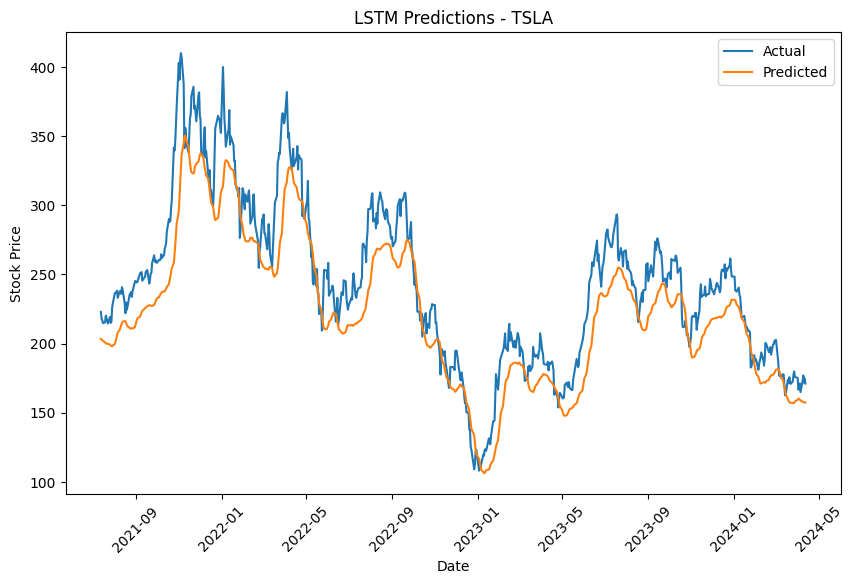

Evaluating LSTM Performance for TSLA
Mean Squared Error (MSE): 793.5205790365317
Root Mean Squared Error (RMSE): 28.169497316007106
Mean Absolute Error (MAE): 22.83368391116804
R^2 Score: 0.7734331388964734


C:\Users\ashma\AppData\Roaming\Python\Python311\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


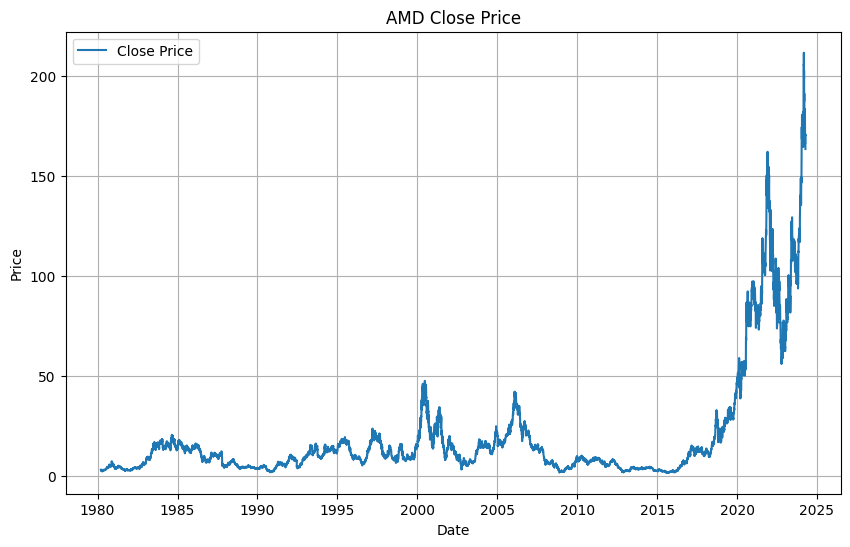

Epoch 1/10
250/250 - 4s - loss: 1.2105e-04 - val_loss: 1.4817e-05 - 4s/epoch - 14ms/step
Epoch 2/10
250/250 - 1s - loss: 5.0201e-05 - val_loss: 1.1459e-05 - 1s/epoch - 5ms/step
Epoch 3/10
250/250 - 1s - loss: 4.0857e-05 - val_loss: 8.8789e-06 - 1s/epoch - 4ms/step
Epoch 4/10
250/250 - 1s - loss: 3.9401e-05 - val_loss: 3.6710e-06 - 1s/epoch - 5ms/step
Epoch 5/10
250/250 - 1s - loss: 3.8666e-05 - val_loss: 2.6547e-05 - 1s/epoch - 5ms/step
Epoch 6/10
250/250 - 1s - loss: 3.6217e-05 - val_loss: 7.2866e-06 - 1s/epoch - 5ms/step
Epoch 7/10
250/250 - 1s - loss: 3.1643e-05 - val_loss: 2.8054e-06 - 1s/epoch - 5ms/step
Epoch 8/10
250/250 - 1s - loss: 3.0026e-05 - val_loss: 1.4047e-06 - 1s/epoch - 5ms/step
Epoch 9/10
250/250 - 1s - loss: 2.7087e-05 - val_loss: 2.2287e-06 - 1s/epoch - 5ms/step
Epoch 10/10
250/250 - 1s - loss: 3.0888e-05 - val_loss: 9.9723e-06 - 1s/epoch - 5ms/step
70/70 [==============================] - 0s 2ms/step


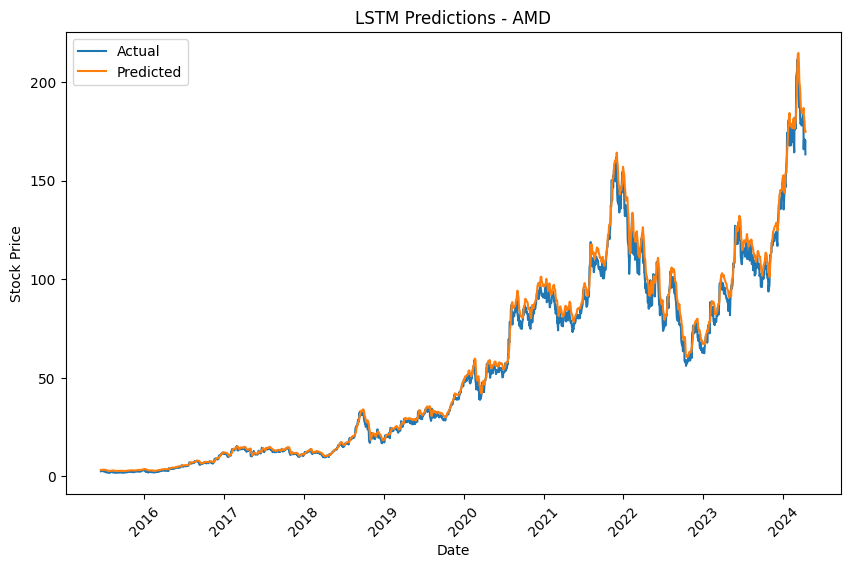

Evaluating LSTM Performance for AMD
Mean Squared Error (MSE): 19.127192027374836
Root Mean Squared Error (RMSE): 4.37346453368206
Mean Absolute Error (MAE): 2.8652213524183354
R^2 Score: 0.991331005411373


In [15]:
for symbol in symbols:
    dates, stock_data = get_stock_data(symbol)
    data = stock_data 
    
    # Normalize data
    scaler = MinMaxScaler()
    data_scaled = scaler.fit_transform(data)
    
    # Create sequences and targets
    X, y = create_sequences(data_scaled, sequence_length)
    
    # Split the data into training and testing sets
    split_ratio = 0.8
    split_index = int(split_ratio * len(X))
    X_train, X_test = X[:split_index], X[split_index:]
    y_train, y_test = y[:split_index], y[split_index:]
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
    
    # Build the LSTM model with dropout for regularization
    lstm_model = Sequential([
        LSTM(units=50, activation='relu', input_shape=(X_train.shape[1], 1), return_sequences=True),
        Dropout(0.2),  # Add dropout with a 20% rate
        LSTM(units=50),
        Dropout(0.2),  # Another dropout layer for additional regularization
        Dense(units=1)
    ])
    lstm_model.compile(optimizer='adam', loss='mean_squared_error')
    
    # Adjusted early stopping callback to be more sensitive to overfitting
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    
    # Train the LSTM model with the updated early stopping callback
    lstm_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1, verbose=2, callbacks=[early_stopping])
    
    # Predict on the test set with the LSTM model
    predictions_scaled_lstm = lstm_model.predict(X_test)
    predictions_lstm = scaler.inverse_transform(predictions_scaled_lstm)
    y_test_original = scaler.inverse_transform(y_test)
    
    # Plot actual vs. predicted values for LSTM
    plot_predictions_with_dates(dates[split_index + sequence_length:], y_test_original, predictions_lstm, f'LSTM Predictions - {symbol}')
    
    # Evaluate LSTM model performance with additional metrics
    print(f'Evaluating LSTM Performance for {symbol}')
    evaluate_model_performance(y_test_original, predictions_lstm)